In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [51]:
#url= "https://myanimelist.net/topanime.php"
#response = requests.get(url)

#soup = BeautifulSoup(response.text, 'html.parser')
#links = soup.select("h3 > a.hoverinfo_trigger")
#print(links[0])
#print(links[0].get("href"))



In [59]:
urls = ["https://myanimelist.net/topanime.php", "https://myanimelist.net/topanime.php?limit=50"]
links = []

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    links.extend(soup.select("h3 > a.hoverinfo_trigger"))

print(len(links))

100


In [3]:
df_headers = ['Rank', 'Score', 'Popularity', 'Title', 'Type', 'Source', 'Genres', 'Demographic', 'Rating']

href = "https://myanimelist.net/anime/52991/Sousou_no_Frieren"
response = requests.get(href)
soup = BeautifulSoup(response.text, 'html.parser')

#getting data:
rank = soup.select_one('span.ranked > strong').get_text(strip=True).replace("#", "")
title = soup.select_one('h1.title-name > strong').get_text(strip=True)
score = soup.select_one('div.score-label').get_text(strip=True)
popularity = soup.select_one('span.popularity > strong').get_text(strip=True).replace("#", "")
anime_type = soup.find("span", string="Type:").parent.get_text(strip=True).replace("Type:", "")

print(rank)
print(title)
print(score)
print(popularity)
print(anime_type)

1
Sousou no Frieren
9.29
121
TV


---

In [2]:
df = pd.read_csv('top_anime_data_2024.csv', usecols=['Rank', 'Score', 'Popularity', 'Title', 'Type', 'Source', 'Genres', 'Demographic', 'Rating'])
df.head()

,Score,Popularity,Rank,Title,Type,Source,Genres,Demographic,Rating
0,9.38,284,1,Frieren: Beyond Journey's End,TV,Manga,"Adventure, Drama, Fantasy",Shounen,PG-13 - Teens 13 or older
1,9.09,3,2,Fullmetal Alchemist: Brotherhood,TV,Manga,"Action, Adventure, Drama, Fantasy",Shounen,R - 17+ (violence & profanity)
2,9.07,13,3,GATE,Steins,Funimation,White Fox,Visual novel,NaN
3,9.06,342,4,Gintama Season 4,TV,Manga,"Action, Comedy, Sci-Fi",Shounen,PG-13 - Teens 13 or older
4,9.05,21,5,Attack on Titan Season 3 Part 2,TV,Manga,"Action, Drama, Suspense",Shounen,R - 17+ (violence & profanity)


In [3]:
df.isna().sum()

Score            0
Popularity       0
Rank             0
Title           14
Type             0
Source           0
Genres         229
Demographic    472
Rating           1
dtype: int64

In [ ]:
# filling empty data with "Unknown"
df.fillna("Unknown", inplace=True)
df.isna().sum()

Score          0
Popularity     0
Rank           0
Title          0
Type           0
Source         0
Genres         0
Demographic    0
Rating         0
dtype: int64

### Genres

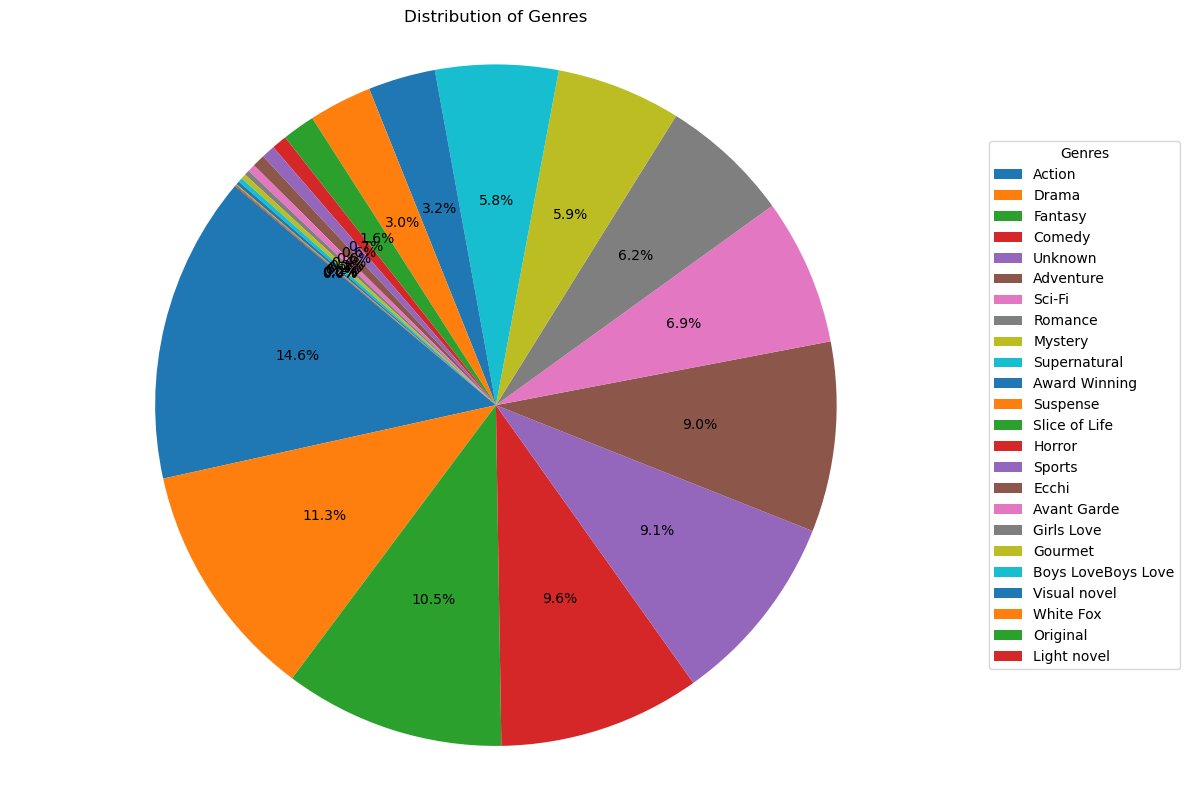

In [27]:
df = df.dropna(subset=['Genres'])
split_genres = df['Genres'].str.split(',')
all_genres = [genre.strip() for sublist in split_genres for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    genre_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140
)
plt.legend(wedges, genre_counts.index, title="Genres", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Genres')
plt.axis('equal') # turns the chart into a circle
plt.tight_layout()
plt.show()

### Demographic

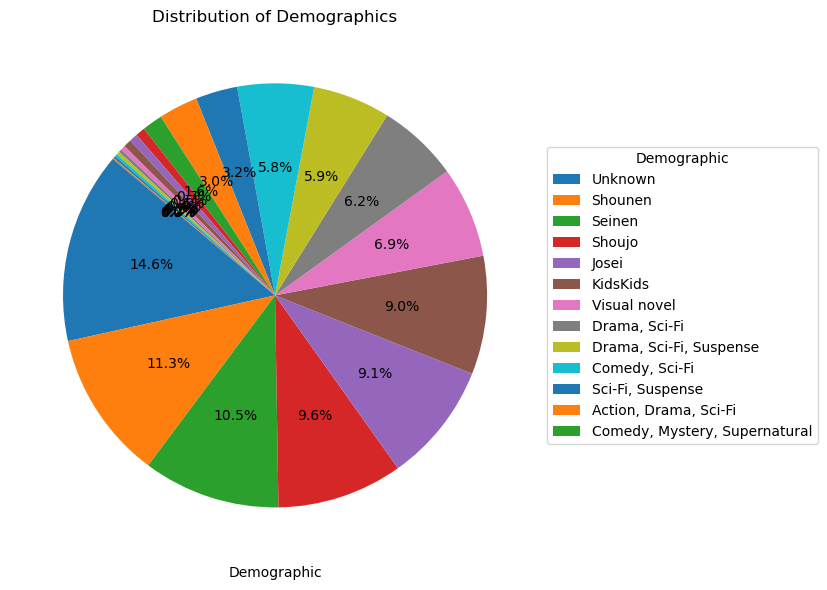

In [30]:
demographic_counts = df['Demographic'].value_counts()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    genre_counts,
    labels=None,  # No labels directly on the pie
    autopct='%1.1f%%',
    startangle=140
)
plt.legend(wedges, demographic_counts.index, title="Demographic", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Demographics')
plt.xlabel('Demographic')
plt.tight_layout()
plt.show()

### Scores per Genre

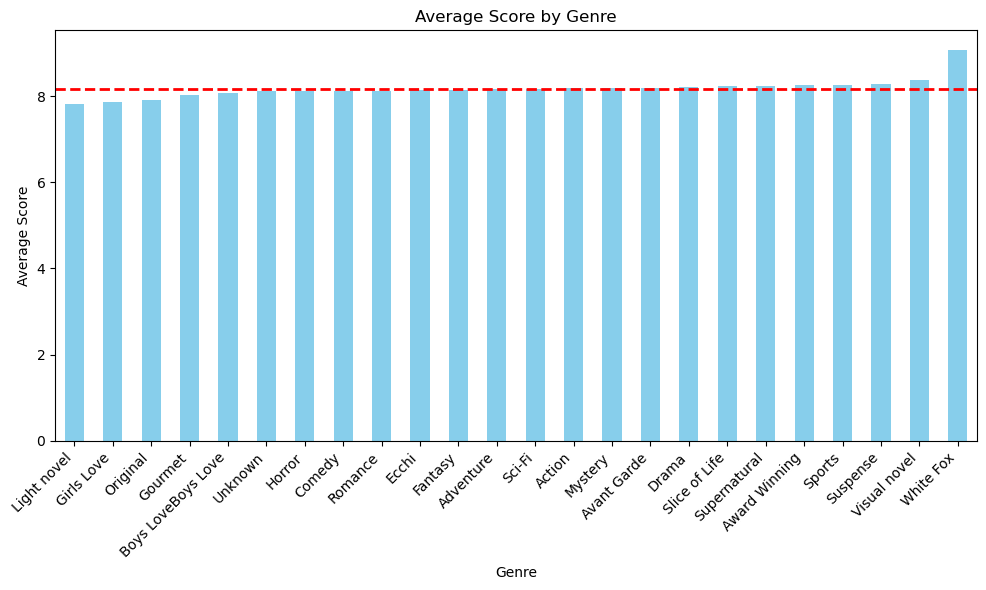

In [39]:
# Organizing the data:
df = df.dropna(subset=['Score', 'Genres'])
df['Genres'] = df['Genres'].str.split(',')
df = df.explode('Genres')
df['Genres'] = df['Genres'].str.strip()

genre_scores = df.groupby('Genres')['Score'].mean().sort_values(ascending=True)

# setting chart:
plt.figure(figsize=(10, 6))
genre_scores.plot(kind='bar', color='skyblue')

# line to mark the mean value:
overall_avg = df['Score'].mean()
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ({overall_avg:.2f})')

# displaying the data:
plt.title('Average Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Scores per Demographic

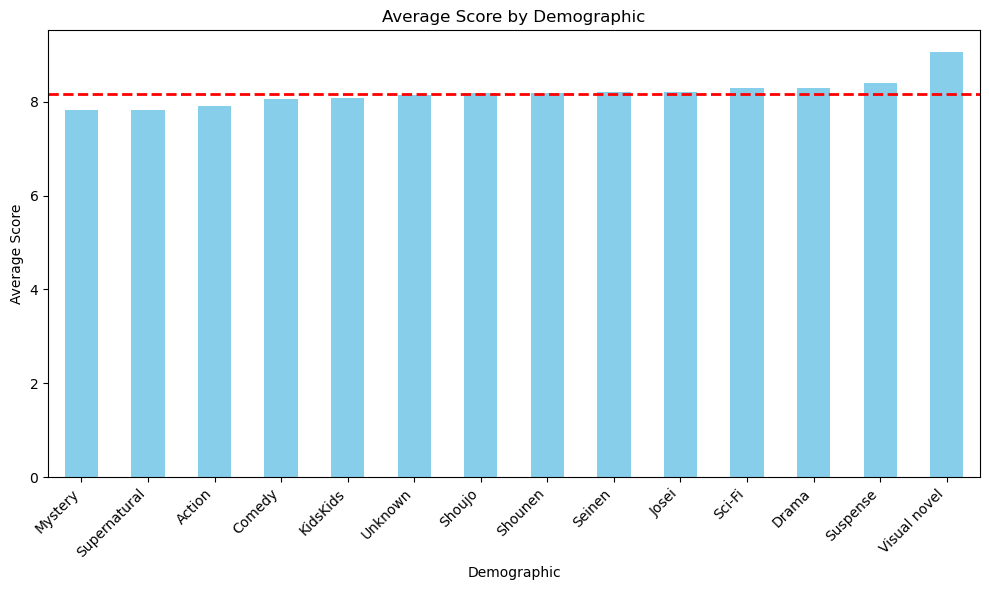

In [43]:
# Organizing the data:
df = df.dropna(subset=['Score', 'Demographic'])
df = df.explode('Demographic')
df['Demographic'] = df['Demographic'].str.strip()

genre_scores = df.groupby('Demographic')['Score'].mean().sort_values(ascending=True)

# setting chart:
plt.figure(figsize=(10, 6))
genre_scores.plot(kind='bar', color='skyblue')

# line to mark the mean value:
overall_avg = df['Score'].mean()
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ({overall_avg:.2f})')

# displaying the data:
plt.title('Average Score by Demographic')
plt.xlabel('Demographic')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()